
### 编程实现：作物模型的开发与应用

将作物生长模型算法编码实现，并开发用户界面或API，使得非专业人员能够方便地使用模型，是模型开发过程中的重要步骤。以下是一个示例的、简单的编程实现代码：

Temperature: 20 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 22 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 25 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 28 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 30 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 32 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 34 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 35 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 33 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.50 mm/day
Temperature: 30 °C, Net Photosynthesis Rate: 10.00 μmol CO2 m-2 s-1, Transpiration Rate: 0.

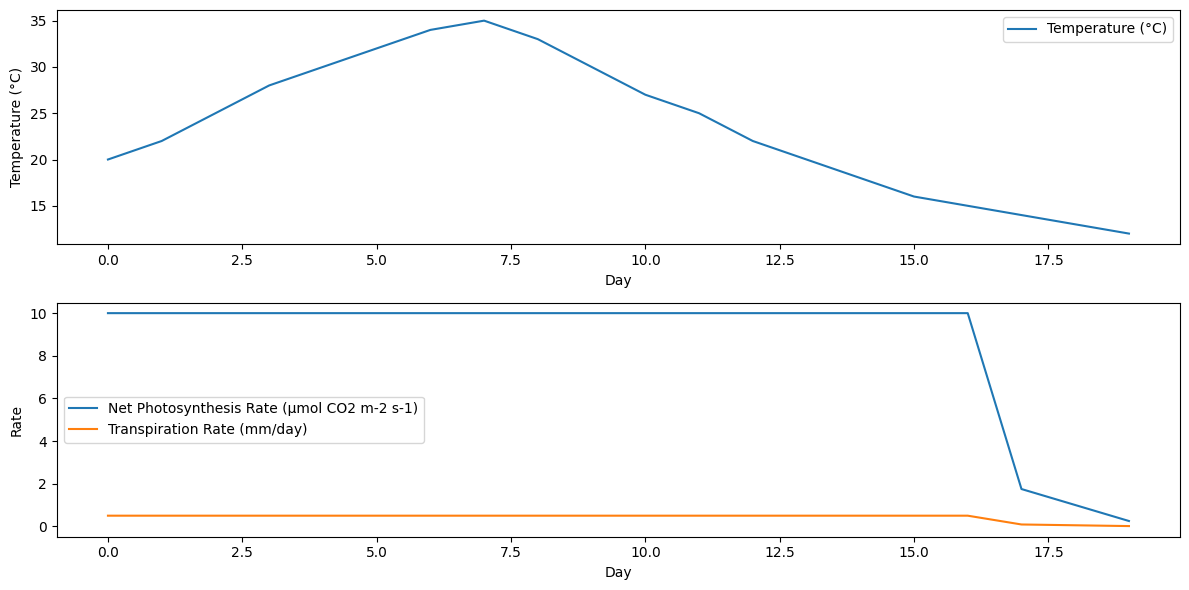

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义模型参数
params = {
    'max_photosynthesis_rate': 30,  # 最大光合速率 (μmol CO2 m-2 s-1)
    'respiration_rate': 5,          # 呼吸速率 (μmol CO2 m-2 s-1)
    'transpiration_coefficient': 0.05,  # 蒸腾系数
    'temperature_factor_base': 1.0,  # 温度影响因子基准值
    'precipitation_factor_base': 1.0  # 降水影响因子基准值
}

# 定义模型函数
def simulate_growth(temperature, light_intensity, water_content, precipitation):
    max_photosynthesis_rate = params['max_photosynthesis_rate']
    respiration_rate = params['respiration_rate']
    transpiration_coefficient = params['transpiration_coefficient']
    temperature_factor_base = params['temperature_factor_base']
    precipitation_factor_base = params['precipitation_factor_base']

    # 计算温度影响因子
    if temperature < 15:
        temperature_factor = temperature_factor_base * (0.5 + 0.05 * (temperature - 15))
    elif temperature > 35:
        temperature_factor = temperature_factor_base * (1.5 - 0.05 * (temperature - 35))
    else:
        temperature_factor = temperature_factor_base

    # 计算降水影响因子
    if precipitation < 50:
        precipitation_factor = precipitation_factor_base * (0.5 + 0.01 * (precipitation - 50))
    elif precipitation > 150:
        precipitation_factor = precipitation_factor_base * (1.5 - 0.01 * (precipitation - 150))
    else:
        precipitation_factor = precipitation_factor_base

    # 计算光合速率
    photosynthesis_rate = max_photosynthesis_rate * (light_intensity / 1000) * temperature_factor * precipitation_factor

    # 计算净光合速率
    net_photosynthesis_rate = photosynthesis_rate - respiration_rate

    # 计算蒸腾速率
    transpiration_rate = transpiration_coefficient * net_photosynthesis_rate

    return net_photosynthesis_rate, transpiration_rate

# 示例数据
# 假设我们有一组每天的温度数据
temperatures = [20, 22, 25, 28, 30, 32, 34, 35, 33, 30, 27, 25, 22, 20, 18, 16, 15, 14, 13, 12]
light_intensity = 500  # 光照强度 (μmol photons m-2 s-1)
water_content = 0.8  # 土壤水分含量 (m3 m-3)
precipitation = 100  # 降水量 (mm)

# 初始化结果列表
net_photosynthesis_rates = []
transpiration_rates = []

# 运行模型
for temperature in temperatures:
    net_photosynthesis_rate, transpiration_rate = simulate_growth(temperature, light_intensity, water_content, precipitation)
    net_photosynthesis_rates.append(net_photosynthesis_rate)
    transpiration_rates.append(transpiration_rate)

# 打印结果
for i, temp in enumerate(temperatures):
    print(f'Temperature: {temp} °C, Net Photosynthesis Rate: {net_photosynthesis_rates[i]:.2f} μmol CO2 m-2 s-1, Transpiration Rate: {transpiration_rates[i]:.2f} mm/day')

# 可视化结果
days = range(len(temperatures))
plt.figure(figsize=(12, 6))

# 绘制温度变化
plt.subplot(2, 1, 1)
plt.plot(days, temperatures, label='Temperature (°C)')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend()

# 绘制净光合速率和蒸腾速率
plt.subplot(2, 1, 2)
plt.plot(days, net_photosynthesis_rates, label='Net Photosynthesis Rate (μmol CO2 m-2 s-1)')
plt.plot(days, transpiration_rates, label='Transpiration Rate (mm/day)')
plt.xlabel('Day')
plt.ylabel('Rate')
plt.legend()

plt.tight_layout()
plt.show()


### 解释

1.  **模型参数**：
    
    -   `max_photosynthesis_rate`: 最大光合速率。
    -   `respiration_rate`: 呼吸速率。
    -   `transpiration_coefficient`: 蒸腾系数。
    -   `temperature_factor_base`: 温度影响因子基准值，默认为1.0。
    -   `precipitation_factor_base`: 降水影响因子基准值，默认为1.0。
2.  **模型函数**：
    
    -   **温度影响因子**：根据温度调整光合速率。如果温度低于15°C，温度影响因子逐渐降低；如果温度高于35°C，温度影响因子逐渐降低。
    -   **降水影响因子**：根据降水量调整光合速率。如果降水量低于50mm，降水影响因子逐渐降低；如果降水量高于150mm，降水影响因子逐渐降低。
    -   **光合速率**：计算光合速率时考虑温度和降水的影响。
    -   **净光合速率**：计算净光合速率时减去呼吸速率。
    -   **蒸腾速率**：根据蒸腾系数和净光合速率计算蒸腾速率。
3.  **示例数据**：
    
    -   `temperatures`: 每天的温度数据列表。
    -   `light_intensity`: 光照强度 (μmol photons m-2 s-1)。
    -   `water_content`: 土壤水分含量 (m3 m-3)。
    -   `precipitation`: 降水量 (mm)。
4.  **运行模型**：
    
    -   使用一个循环遍历每一天的温度数据，调用 `simulate_growth` 函数，计算每一天的净光合速率和蒸腾速率，并将结果存储在列表中。
5.  **打印结果**：
    
    -   打印每一天的温度、净光合速率和蒸腾速率。
6.  **可视化结果**：
    
    -   使用 `matplotlib` 绘制温度变化图和净光合速率、蒸腾速率的变化图。

通过这种方式，我们可以更准确地模拟不同温度条件下的作物生长过程，并观察其随时间的变化趋势。希望这个改写后的代码对你有帮助！